In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [162]:
data = pd.read_parquet('../data/processed/news-consolidated-v2.parquet')
data = data.sort_values(by="date")
data = data[40:]

/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/4006813218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negData["sentiment_score"] = negData["sentiment_score"] * -1
/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/4006813218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuData["sentiment_score"] = neuData["sentiment_score"] - neuData["sentiment_score"].mean()
/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/4006813218.py:8: FutureWarning: The de

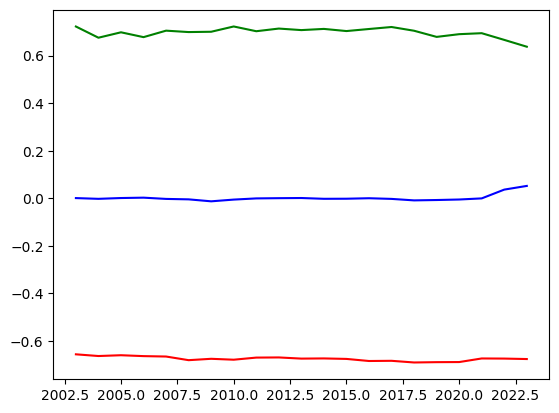

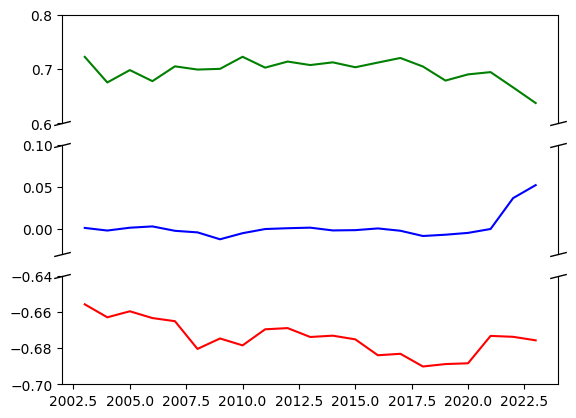

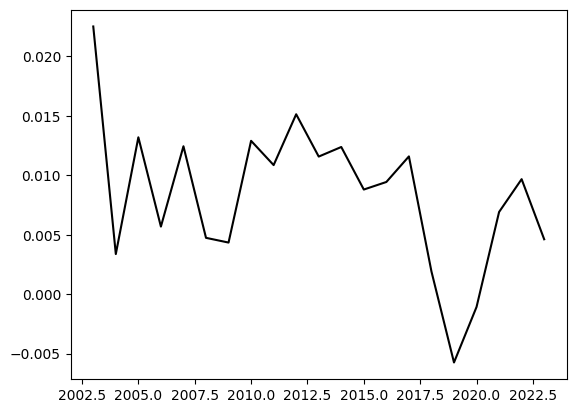

In [163]:
data = data.sort_values(by="date")
data["years"] = data["date"].dt.year
negData = data[data["sentiment_label"] == "negative"]
negData["sentiment_score"] = negData["sentiment_score"] * -1
posData = data[data["sentiment_label"] == "positive"]
neuData = data[data["sentiment_label"] == "neutral"]
neuData["sentiment_score"] = neuData["sentiment_score"] - neuData["sentiment_score"].mean()
negAverage = negData.groupby("years").mean()
negAverage["sentiment_score"].to_json("../data/vis/negAveragePerYear.json", orient="split")
plt.plot(negData["years"].unique(), negAverage["sentiment_score"], color="red")
posAverage = posData.groupby("years").mean()
posAverage["sentiment_score"].to_json("../data/vis/posAveragePerYear.json", orient="split")
plt.plot(posData["years"].unique(), posAverage["sentiment_score"], color="green")
neuAverage = neuData.groupby("years").mean()
neuAverage["sentiment_score"].to_json("../data/vis/neuAveragePerYear.json", orient="split")
plt.plot(neuData["years"].unique(), neuAverage["sentiment_score"], color="blue")
plt.show()
average = (neuAverage["sentiment_score"] * len(neuAverage) + posAverage["sentiment_score"] * len(posAverage) + negAverage["sentiment_score"] * len(negAverage)) / (len(neuAverage) + len(posAverage) + len(negAverage))
average.to_json("../data/vis/overallAveragePerYear.json", orient="split")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(posData["years"].unique(), posAverage["sentiment_score"], color="green")
ax1.set_ylim(.6, .8)
ax1.spines.bottom.set_visible(False)
ax1.tick_params(bottom = False)
ax3.plot(negData["years"].unique(), negAverage["sentiment_score"], color="red")
ax3.set_ylim(-.7, -.64)
ax3.spines.top.set_visible(False)

ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.tick_params(bottom=False)
ax2.tick_params(top=False)
ax2.plot(neuData["years"].unique(), neuAverage["sentiment_score"], color="blue")
ax2.set_ylim(-.03, .1)

d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)
plt.show()
plt.plot(data["years"].unique(), average, color="black")
plt.show()



In [164]:
'''negData["month"] = negData["date"].dt.month
negData["ym"] = negData.apply(lambda x: str(x["years"]) + "/" + str(x["month"]), axis=1)
neuData["month"] = neuData["date"].dt.month
neuData["ym"] = neuData.apply(lambda x: str(x["years"]) + "/" + str(x["month"]), axis=1)
posData["month"] = posData["date"].dt.month
posData["ym"] = posData.apply(lambda x: str(x["years"]) + "/" + str(x["month"]), axis=1)
data["month"] = data["date"].dt.month
data["ym"] = data.apply(lambda x: str(x["years"]) + "/" + str(x["month"]), axis=1)'''
negData["ym"] = negData['date'].dt.strftime("%Y-%m")
negAverage = negData.groupby("ym").mean()
negAverage["sentiment_score"].to_json("../data/vis/negAveragePerMonth.json", orient="split")
#plt.plot(negData["ym"].unique(), negAverage["sentiment_score"], color="red")
posData["ym"] = posData['date'].dt.strftime("%Y-%m")
posAverage = posData.groupby("ym").mean()
posAverage["sentiment_score"].to_json("../data/vis/posAveragePerMonth.json", orient="split")
#plt.plot(posData["ym"].unique(), posAverage["sentiment_score"], color="green")
neuData["ym"] = neuData['date'].dt.strftime("%Y-%m")
neuAverage = neuData.groupby("ym").mean()
neuAverage["sentiment_score"].to_json("../data/vis/neuAveragePerMonth.json", orient="split")
#plt.plot(neuData["ym"].unique(), neuAverage["sentiment_score"], color="blue")
#plt.show()
average = (neuAverage["sentiment_score"] * len(neuAverage) + posAverage["sentiment_score"] * len(posAverage) + negAverage["sentiment_score"] * len(negAverage)) / (len(neuAverage) + len(posAverage) + len(negAverage))
#plt.plot(data["ym"].unique(), average, color="black")
window = 12
average_data = []
for ind in range(len(average) - window + 1):
    average_data.append(np.mean(average[ind:ind+window]))
average_data = pd.DataFrame(average_data)
average_data.to_json("../data/vis/overallAveragePerMonth.json")
#plt.plot(data["ym"].unique()[:len(average) - window + 1], average_data, color="blue")
#plt.show()

/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/3409846791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negData["ym"] = negData['date'].dt.strftime("%Y-%m")
/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/3409846791.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  negAverage = negData.groupby("ym").mean()
/var/folders/7h/8hn0w0xs40n29dcvw_5nqwch0000gn/T/ipykernel_21263/3409846791.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [110]:
negData = negData.sort_values(by="sentiment_score")
negatives = negData.groupby("ym")
negatives.first().to_json("../data/vis/mostNegative.json")


In [165]:
numNeg = negData.groupby("years").count()
numPos = posData.groupby("years").count()
numNeu = neuData.groupby("years").count()
years = data["years"].unique()
numNeg["sentiment_score"].to_json("../data/vis/numNegativePerYear.json", orient="split")
numPos["sentiment_score"].to_json("../data/vis/numPositivePerYear.json", orient="split")
numNeu["sentiment_score"].to_json("../data/vis/numNeutralPerYear.json", orient="split")
#plt.plot(years[4:len(years) - 1], numNeg, color="red")
#plt.plot(years[:len(years) - 1], numPos[:27], color="green")
#plt.plot(years[:len(years) - 1], numNeu[:27], color="blue")
#plt.show()